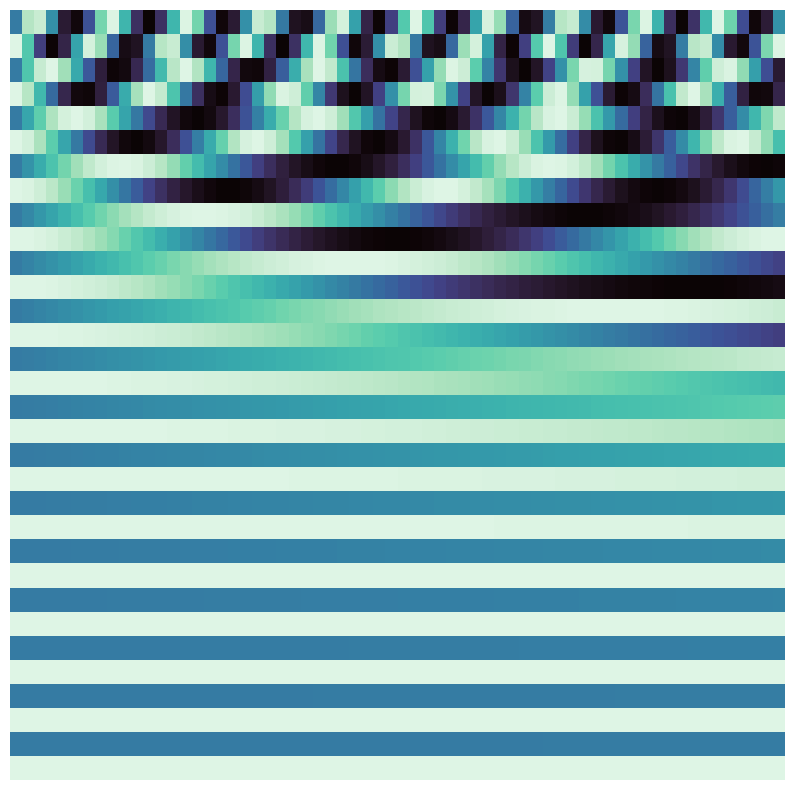

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def get_sin_cos_positional_encoding( max_len, d_model):
    """
    :param max_len: maximum length of the sequence
    :param d_model: dimension of the model
    :return: positional encoding matrix of shape (max_len, d_model)
    """
    position = torch.arange(max_len).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2) * -(torch.log(torch.tensor(10000.0)) / d_model))
    pe = torch.zeros(max_len, d_model)
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    return pe


max_len = 64
d_model = 32
pe = get_sin_cos_positional_encoding(max_len, d_model)

# plot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.figure(figsize=(10, 10))
# heatmap
sns.heatmap(pe.numpy().T, cmap='mako', cbar=False, rasterized=True, xticklabels=[], yticklabels=[])
#save as svg
plt.savefig('positional_encoding.svg', format='svg', bbox_inches='tight')
plt.show()